# Simulation Example

The below is an example of running and graphing simulations in Python.

The following is written in Python 3, although it should be compatible with Python 2.
Graphing can be done in both Matplotlib and ggplot for Python. 

Packages can be installed using `pip3` or `pip2` as appropriate.

### Note that the below code and models are arbitrarily conceived and differ substantially from the homework. Your work will need to be modified accordingly.


In [15]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [16]:
def pareto_wealth_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'w0'          : 10000,      #starting wealth
        'inc'         : 50000,      #starting income
        'gr'          : 1.07,       #growth rate
        'ms'          : 0.05,       #market shocks
        'ir'          : 0.45,       #irrationality
        'st_year'     : int(2006),  #start year
        'lf_years'    : 60,         #years to live
        'a'           : 10,         #shape of pareto pmf 
        'num_draws'   : 15000       #simulations
    }
    """    

    #set random seed
    np.random.seed(524)

    pareto_errors = np.random.pareto(p['a'], (p['lf_years'], p['num_draws']))

    #create a matrix of dim (lf_years, num_draws)
    ln_wealth_mat = np.zeros((p['lf_years'], p['num_draws']))

    #fill the matrix
    ln_wealth_mat[0, :] = np.log(p['w0']) + pareto_errors[0, :]

    #loop and apply model
    for yr in range(1, p['lf_years']):
        ln_wealth_mat[yr, :] = ((1 - p['gr']/4) * (np.log(p['w0']) + p['ms'] * (yr)) +
                                p['ir']/4 * ln_wealth_mat[yr - 1, :]  +
                                np.log(p['inc']/1000+(p['inc']/10000*yr)) +
                                pareto_errors[yr, :])


    wealth_mat = np.exp(ln_wealth_mat) #dealing with large numbers so put in terms of 10k's
    return wealth_mat



## Note: You can write the script in your favorite editor and import it to Jupyter to run:

In [17]:
from example_PS1 import *

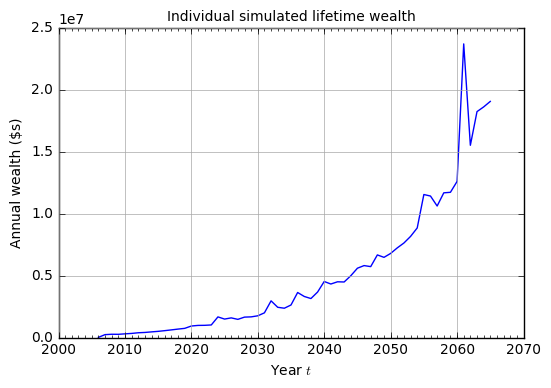

In [18]:
simulation_profile = {
    'w0'          : 10000,
    'inc'         : 50000,
    'gr'          : 1.07,
    'ms'          : 0.05,
    'ir'          : 0.45,
    'st_year'     : int(2006),
    'lf_years'    : 60,
    'a'           : 10, 
    'num_draws'   : 15000
}

wealth_mat = pareto_wealth_sim(simulation_profile)
    
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['lf_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, wealth_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime wealth', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual wealth (\$s)')

In [19]:
years = np.arange(p['st_year'], p['st_year'] + p['lf_years']).tolist()

In [20]:
#Transform Numpy Arrays Into Useful Dataframe
import pandas as pd

df = pd.DataFrame(wealth_mat).T
df.columns = years
df = df.T
df['year'] = df.index
df = pd.melt(df, id_vars='year', var_name='id')
df['ln_w'] = np.log(df.value)
df.head()

,year,id,value,ln_w
0,2006,0,11065.137042,9.311555
1,2007,0,148143.521506,11.905937
2,2008,0,234139.512647,12.363672
3,2009,0,273710.085548,12.519825
4,2010,0,296802.985424,12.600824


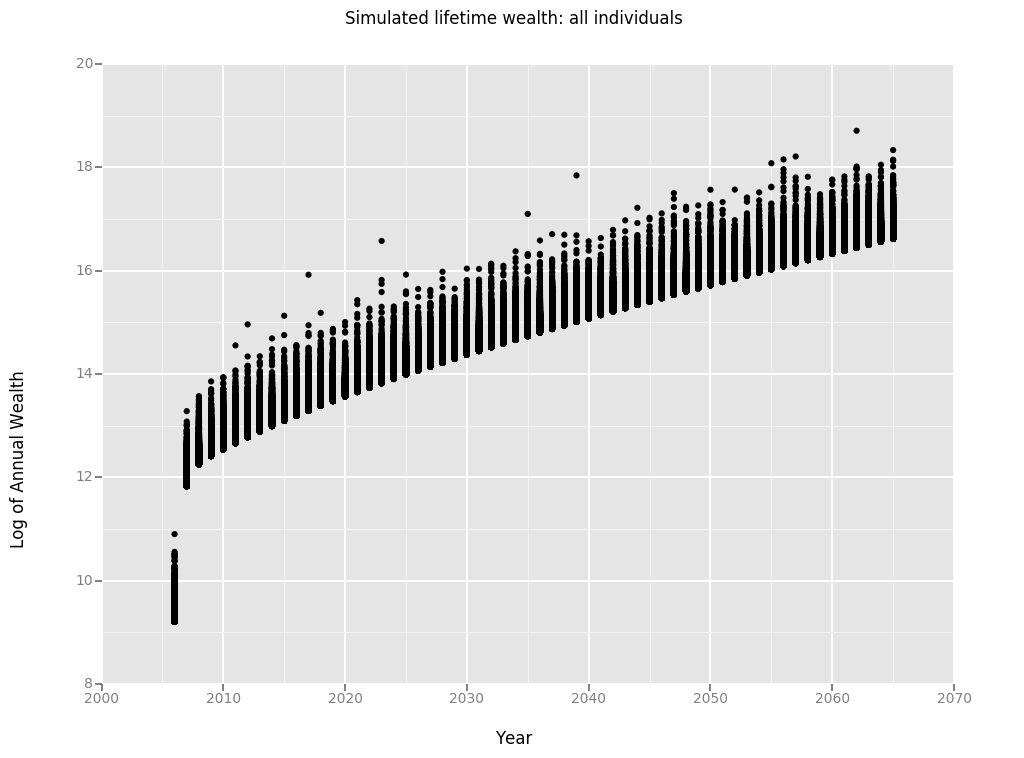

<ggplot: (270487609)>

In [21]:
from ggplot import *
ggplot(aes(x='year', y='ln_w'), data=df) +\
    geom_point() +\
    ylab("Log of Annual Wealth") + xlab("Year")+\
    ggtitle("Simulated lifetime wealth: all individuals")

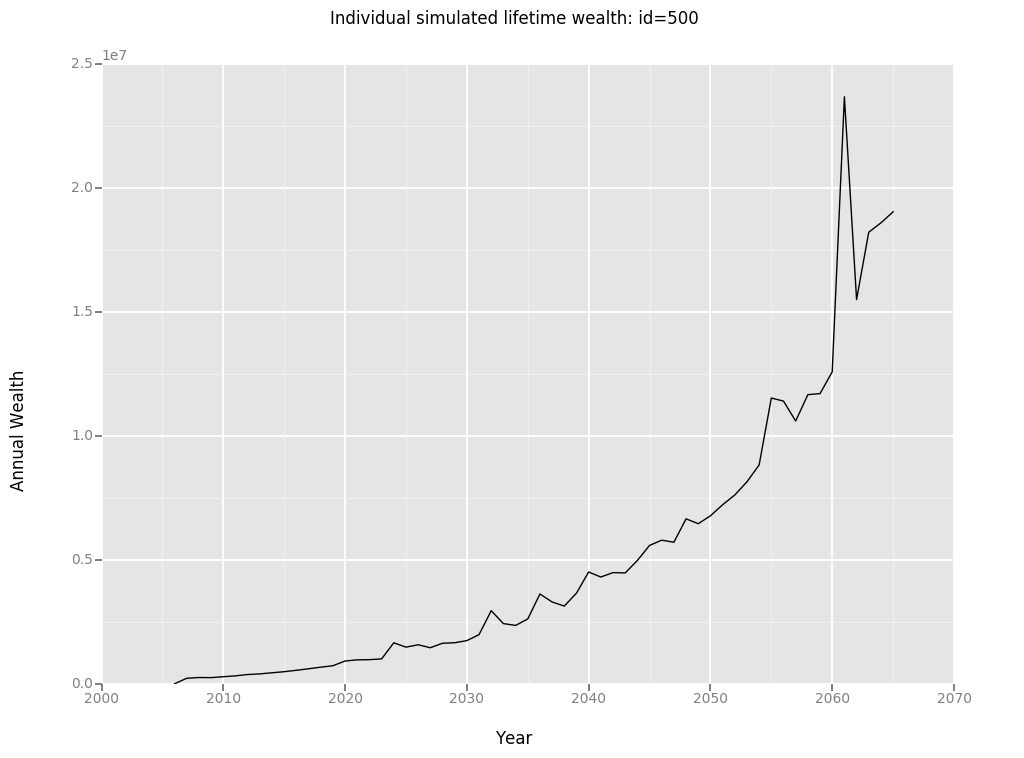

<ggplot: (270492080)>

In [22]:
df_ind = df.loc[df['id'] == 500]
ggplot(aes(x='year', y='value'), data=df_ind) +\
    geom_line() +\
    ylab("Annual Wealth") + xlab("Year")+\
    ggtitle("Individual simulated lifetime wealth: id=500")

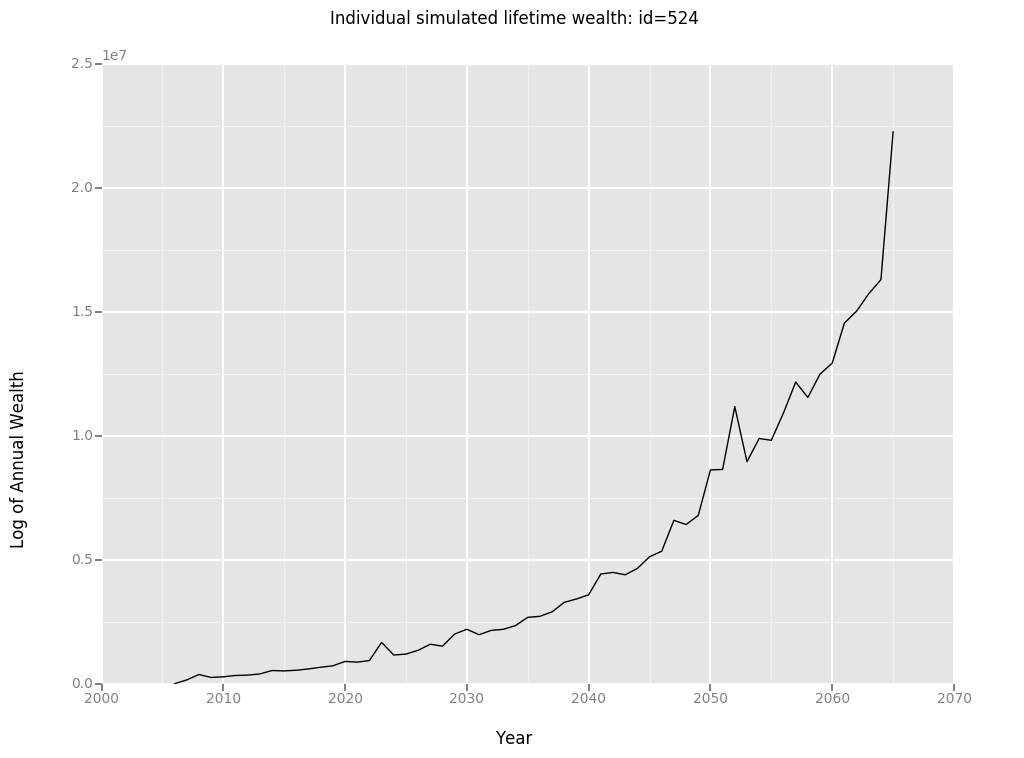

<ggplot: (273517348)>

In [23]:
df_ind = df.loc[df['id'] == 524]
ggplot(aes(x='year', y='value'), data=df_ind) +\
    geom_line() +\
    ylab("Log of Annual Wealth") + xlab("Year")+\
    ggtitle("Individual simulated lifetime wealth: id=524")